# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

We didn't want to use it in the lectures, but believe that it would be very interesting for you to try it out (and maybe read about it on your own).

There are 4 features: sepal length, sepal width, petal length, and petal width.

Start by creating 2 clusters. Then standardize the data and try again. Does it make a difference?

Use the Elbow rule to determine how many clusters are there.


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [2]:
rawdata = pd.read_csv('iris-dataset.csv')
rawdata

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

Text(0, 0.5, 'Width of Sepal')

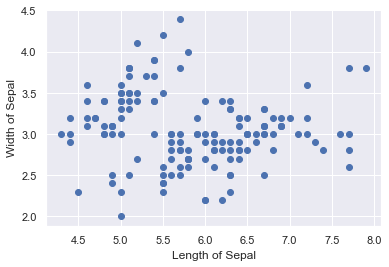

In [3]:
plt.scatter(rawdata['sepal_length'],rawdata['sepal_width'])
plt.xlabel('Length of Sepal')
plt.ylabel('Width of Sepal')

# Clustering (unscaled data)

Separate the original data into 2 clusters.

In [4]:
x = rawdata.copy()

In [5]:
kmeans = KMeans(2)
kmeans

KMeans(n_clusters=2)

In [6]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Width of Sepal')

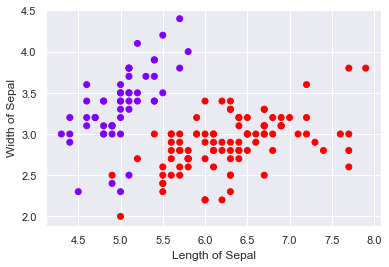

In [7]:
plt.scatter(clusters['sepal_length'],clusters['sepal_width'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Length of Sepal')
plt.ylabel('Width of Sepal')

# Standardize the variables

Import and use the <i> method </i> function from sklearn to standardize the data. 

In [8]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# Clustering (scaled data)

In [9]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [10]:
#display old unscaled data with cluster prediction(done with scaled data)
#better clarity in comparison
clusters_new

,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


Text(0, 0.5, 'Width of Sepal')

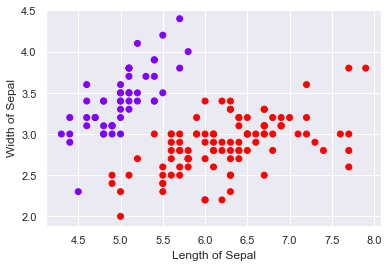

In [11]:
plt.scatter(clusters_new['sepal_length'],clusters_new['sepal_width'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Length of Sepal')
plt.ylabel('Width of Sepal')

## Take Advantage of the Elbow Method

### WCSS

In [12]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.5511767079852,
 91.02916928379734,
 80.19300510158155,
 70.9396437275681,
 62.64100835118801,
 55.03383208484751]

### The Elbow Method

Text(0, 0.5, 'WCSS')

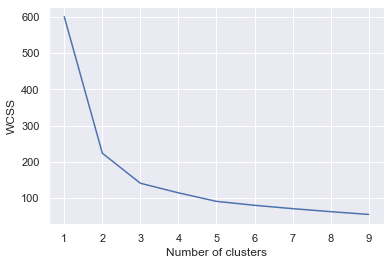

In [13]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#### Taking k = 3 as best solution

In [14]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)
clusters_3 = x.copy()
clusters_3['cluster_pred'] = kmeans_3.fit_predict(x_scaled)

Text(0, 0.5, 'Width of Sepal')

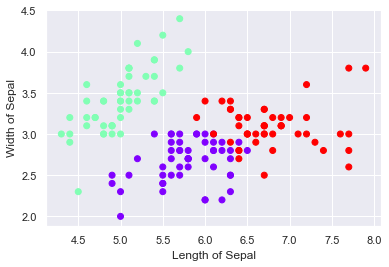

In [15]:
plt.scatter(clusters_3['sepal_length'],clusters_3['sepal_width'],c=clusters_3['cluster_pred'],cmap='rainbow')
plt.xlabel('Length of Sepal')
plt.ylabel('Width of Sepal')

### Compare with real, actual data set

In [16]:
real_data = pd.read_csv('iris-with-answers.csv')

In [17]:
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [18]:
#map species values to respective int
real_data['species'] = real_data['species'].map({'setosa':0, 'versicolor':1 , 'virginica':2})
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


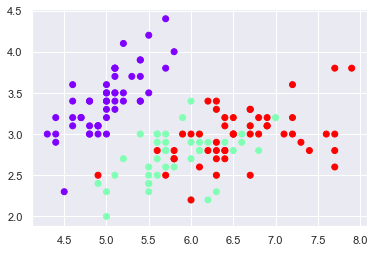

In [19]:
#plot with real data
plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c= real_data ['species'], cmap = 'rainbow')

Pattern is still all over the place, maybe sepal isn't the way to identify or classify each species?

Text(0, 0.5, 'Petal Width')

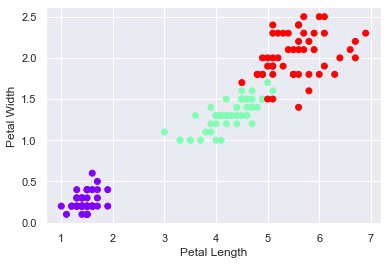

In [21]:
#Plot using petal with real data
plt.scatter(real_data['petal_length'], real_data['petal_width'], c= real_data ['species'], cmap = 'rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Petal Width')

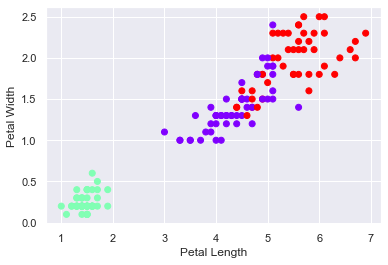

In [23]:
#plot our solution on petal features
plt.scatter(clusters_3['petal_length'], clusters_3['petal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

#### Identified that petal is the feature that we should be looking at to classify Iris flower species